# House of Beta
## Case Student Loans

De basisbeurs is returning, but the large majority of students have debts in the form of student loans. In this case, we will explore some calculations involving loans.
- How to calculate monthly payments.
- Investigate the effects of some future economic scenarios.

## The basics

We start off with the basics

In [1]:
notional = 30000
annual_interest = 0.015
maturity_in_years = 30

## Convert to month
As the repayments are monthly, we need to convert the annual interest to a monthly interest.

You can use the following formulas to convert to monthly data, with $i^m$ as the monthly interest and $i$ as the annual interest. 
$$ i^m = (1 + i)^\frac{1}{12} - 1 $$

In [2]:
monthly_interest = pow(1+annual_interest, 1/12)-1
number_of_payments = maturity_in_years*12
monthly_interest

0.0012414877164492744

## Calculate monthly payments

Student loan payments follow a schedule that is known as an annuity. The total payment each period is unchanging.
$$ N = P * \left(\frac{1 - (1+i^m)^{-n}}{i^m}\right) $$

Here $N$ is the notional, $P$ is the monthly payment and $n$ is the number of payments.

In [3]:
repayment = notional / ((1 - pow(1+monthly_interest, -number_of_payments))/monthly_interest)
repayment

103.38908149922052

## Visualize payments over time

In [4]:
import pandas as pd

<AxesSubplot: >

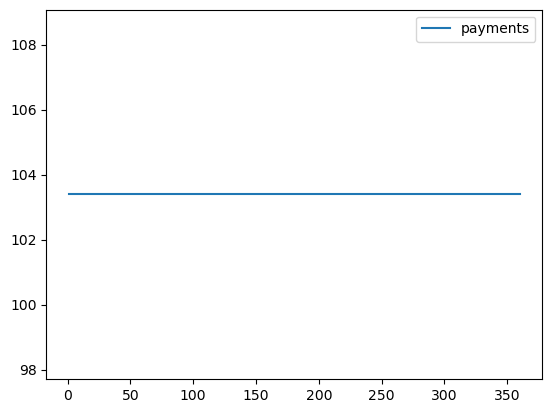

In [8]:
df = pd.DataFrame([repayment for t in range(number_of_payments)], index = [t+1 for t in range(number_of_payments)], columns=['payments'])
df.head()
df.plot()